In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, max_error, explained_variance_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

<Axes: xlabel='x1', ylabel='x2'>

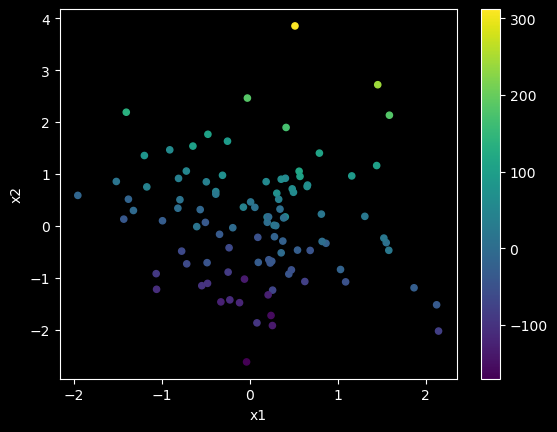

In [2]:
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)
X = pd.DataFrame(X, columns=['x1', 'x2', 'x3'])
y = pd.Series(y, name='y')

X.plot.scatter(x='x1', y='x2', c=y, colormap='viridis')

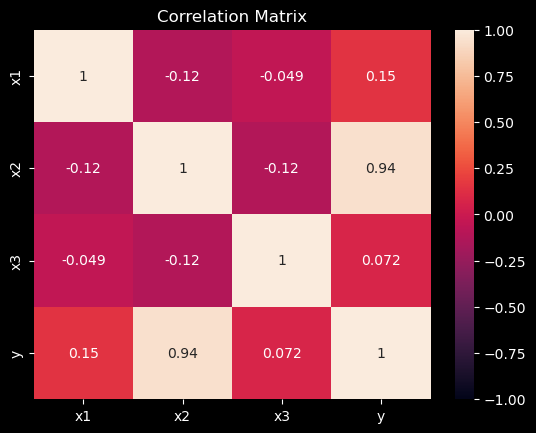

In [3]:
corr_mat =X.copy()
corr_mat['y'] = y
sns.heatmap(corr_mat.corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X[['x1', 'x2']], y, test_size=0.33, random_state=42)

In [5]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')
print(f'Max Error: {max_error(y_test, y_pred)}')
print(f'Explained Variance: {explained_variance_score(y_test, y_pred)}')


MSE: 301.9761221408754
R2: 0.9621017476528111
Max Error: 37.27578075657722
Explained Variance: 0.9626156959183205


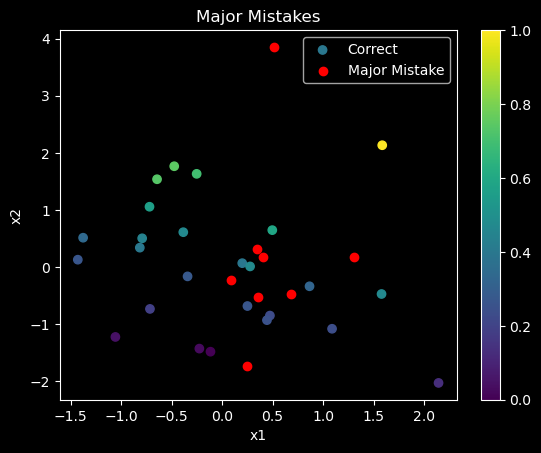

Total samples: 33, Correct: 25, Incorrect: 8, Percent: 24.24%


In [6]:
error = np.abs(y_test - y_pred)
error_75 = np.percentile(error, 75)
incorrect_indices = error > error_75

X_incorrect = X_test.loc[incorrect_indices]
X_correct = X_test.loc[~incorrect_indices]
y_correct = y_test.loc[~incorrect_indices]

plt.scatter(x=X_correct.x1, y=X_correct.x2, c=y_correct, cmap='viridis')
plt.scatter(x=X_incorrect.x1, y=X_incorrect.x2, c='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['Correct', 'Major Mistake'])
plt.colorbar()
plt.title('Major Mistakes')
plt.show()

print(f'Total samples: {len(X_test)}, Correct: {len(X_correct)}, Incorrect: {len(X_incorrect)}, Percent: {len(X_incorrect) / len(X_test) * 100:.2f}%')